In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv(r"C:\Users\sowba\OneDrive\Documents\titanic pyhton\Titanic-Dataset.csv", encoding='latin-1')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic overview of the dataset
data.info()
data.describe()

# Check for missing values
data.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Check data types
print(data.dtypes)

# Convert 'Survived' and 'Pclass' to categorical if they are not
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# Create a 'FamilySize' feature by combining SibSp and Parch
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.drop(columns=['SibSp', 'Parch'], inplace=True)


In [6]:
import pandas as pd
data = pd.read_csv(r"C:\Users\sowba\OneDrive\Documents\titanic pyhton\Titanic-Dataset.csv", encoding='latin-1')

# Fill missing Age with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked with the most common value (mode)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop unnecessary columns like 'Cabin' (too many missing values)
data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


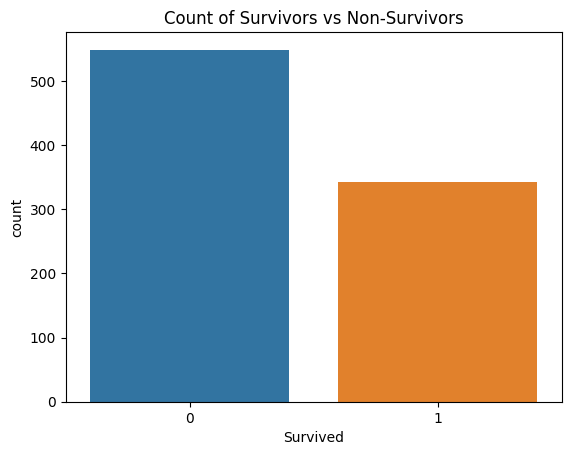

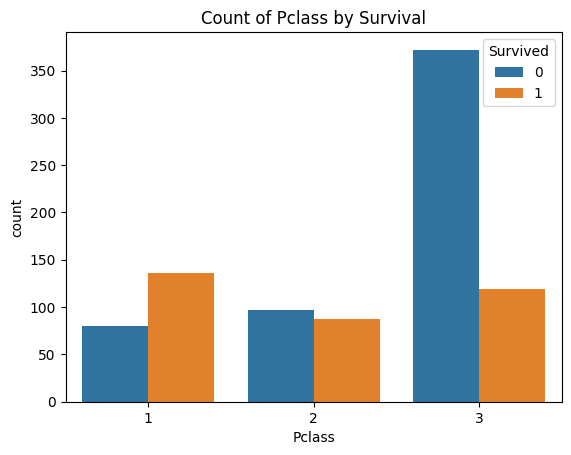

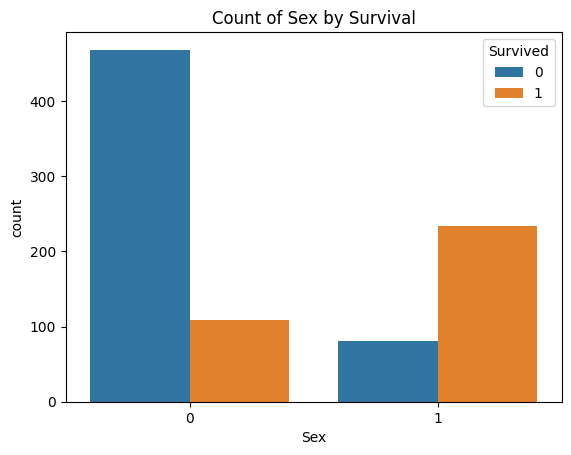

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install --upgrade seaborn matplotlib


# Count plot for Survived
sns.countplot(x='Survived', data=data)
plt.title('Count of Survivors vs Non-Survivors')
plt.show()

# Count plot for Pclass with hue for Survived
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Count of Pclass by Survival')
plt.show()

# Count plot for Sex with hue for Survived
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Count of Sex by Survival')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define features and target variable
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.83


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.83

Confusion Matrix:
[[93 12]
 [18 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [10]:
# Ensure these variables are available from your model
# y_test: actual labels
# y_pred: predicted labels

print(y_test[:5])  # Check first 5 values of y_test
print(y_pred[:5])  # Check first 5 values of y_pred


709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64
[0 0 0 1 0]


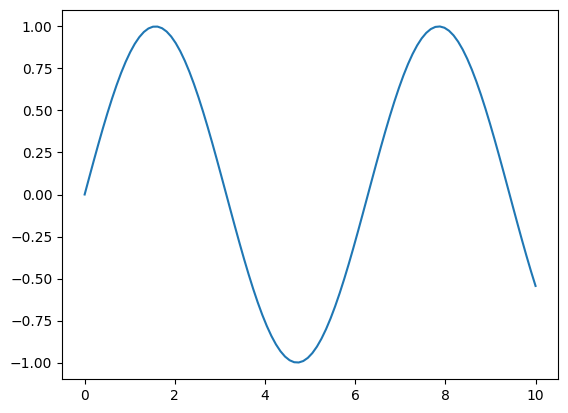

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Columns in DataFrame: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


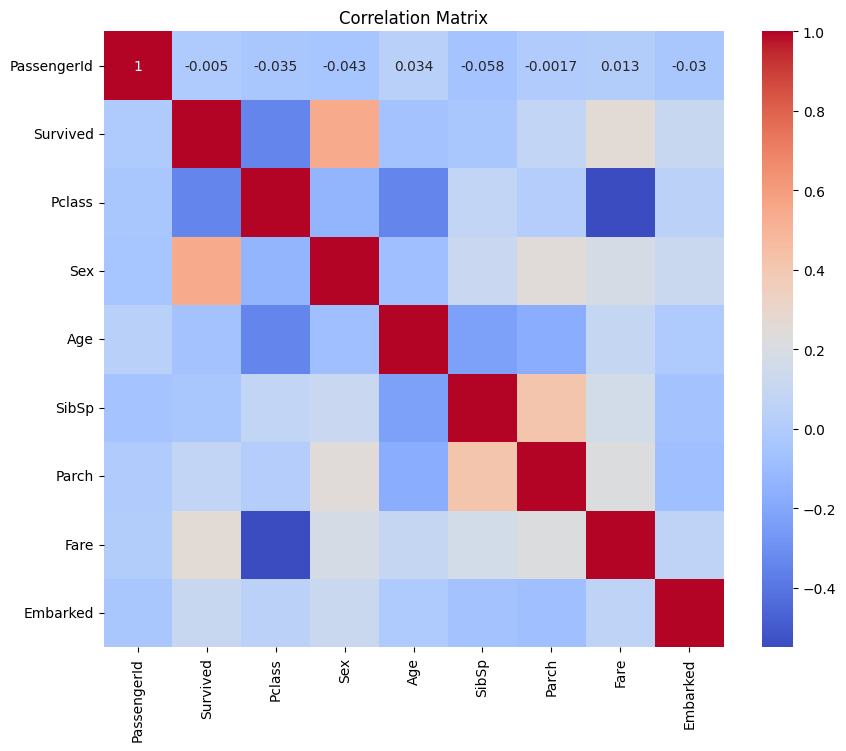

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Check the column names
print("Columns in DataFrame:", data.columns)

# Dropping non-numeric columns (ensure these columns exist)
df_cleaned = data.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')

# Alternatively, select only numeric columns for correlation
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


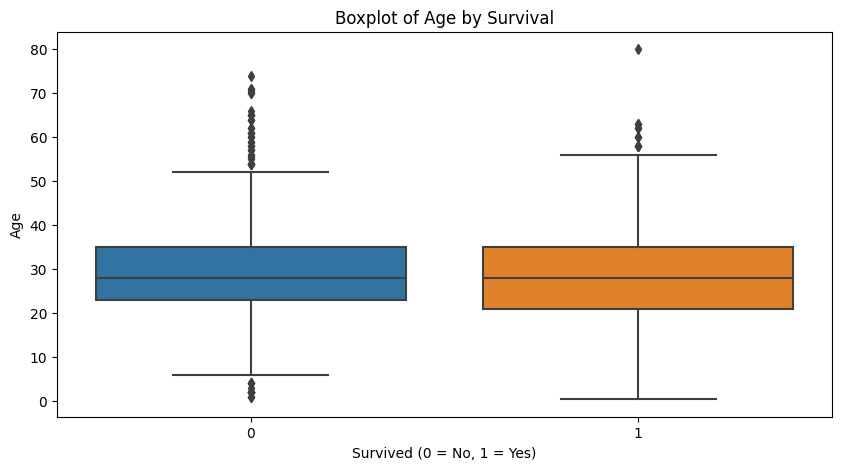

In [21]:
import seaborn as sns

# Boxplot of Age by Survival
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Boxplot of Age by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

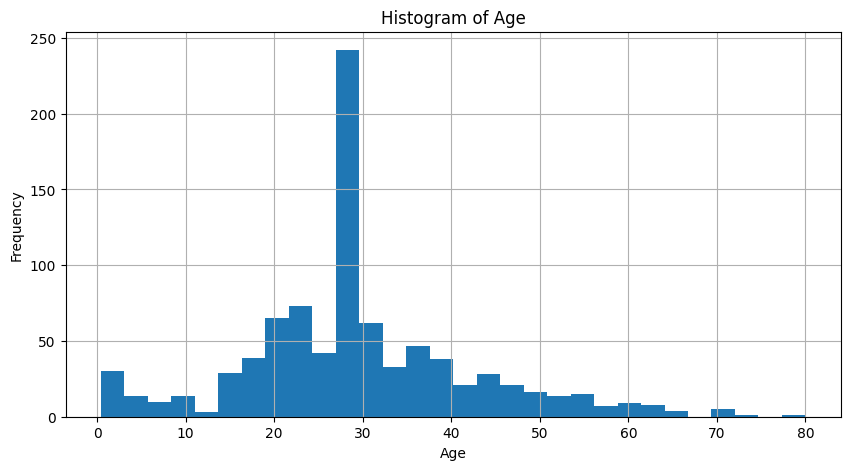

In [23]:
import matplotlib.pyplot as plt

# Histogram of Age
plt.figure(figsize=(10, 5))
data['Age'].hist(bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\sowba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


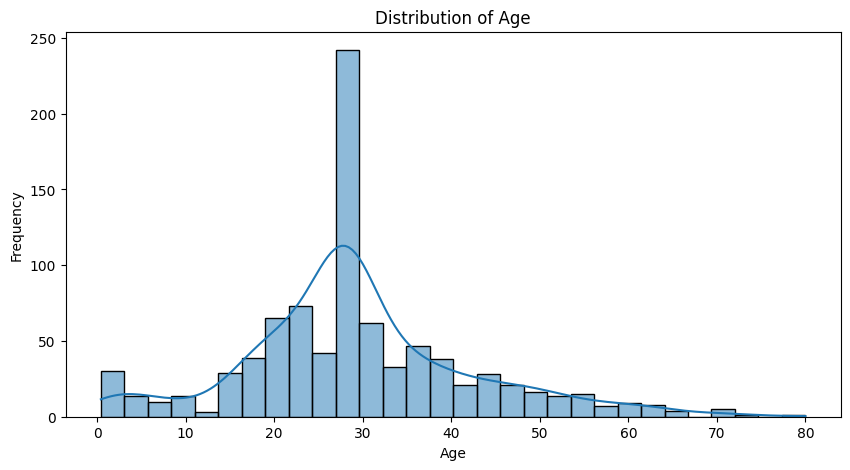

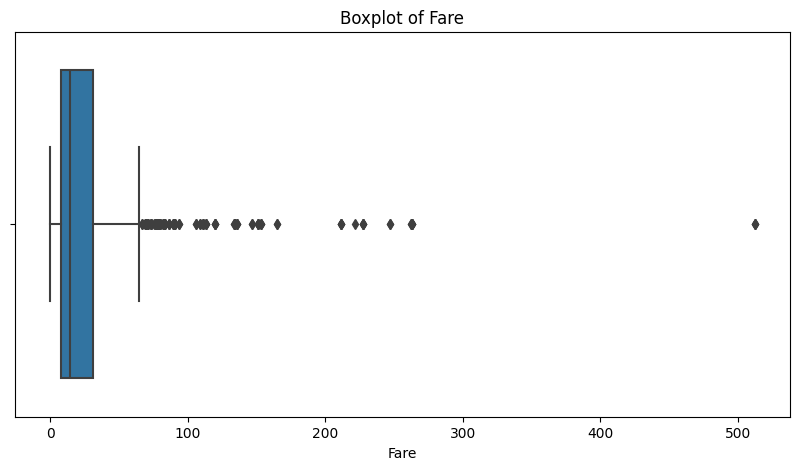

In [25]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(10, 5))
sns.boxplot(x='Fare', data=data)
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()


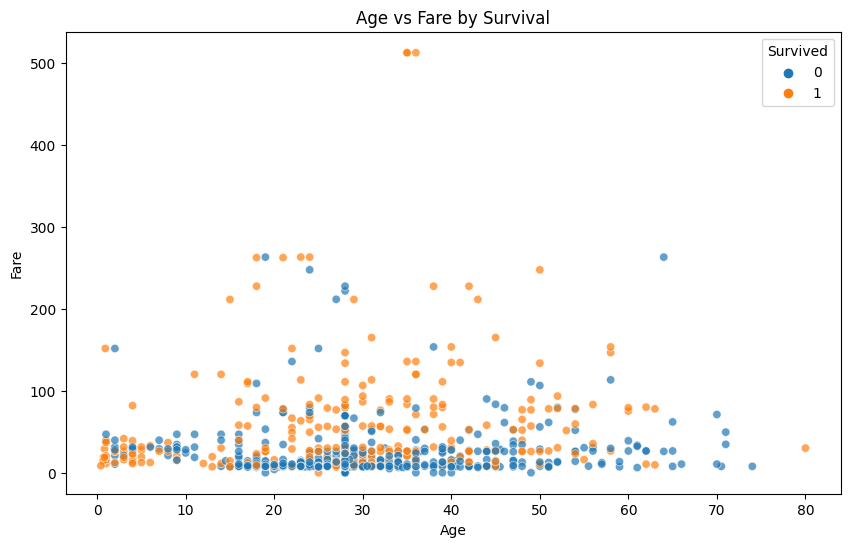

C:\Users\sowba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\sowba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\sowba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\sowba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\sowba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

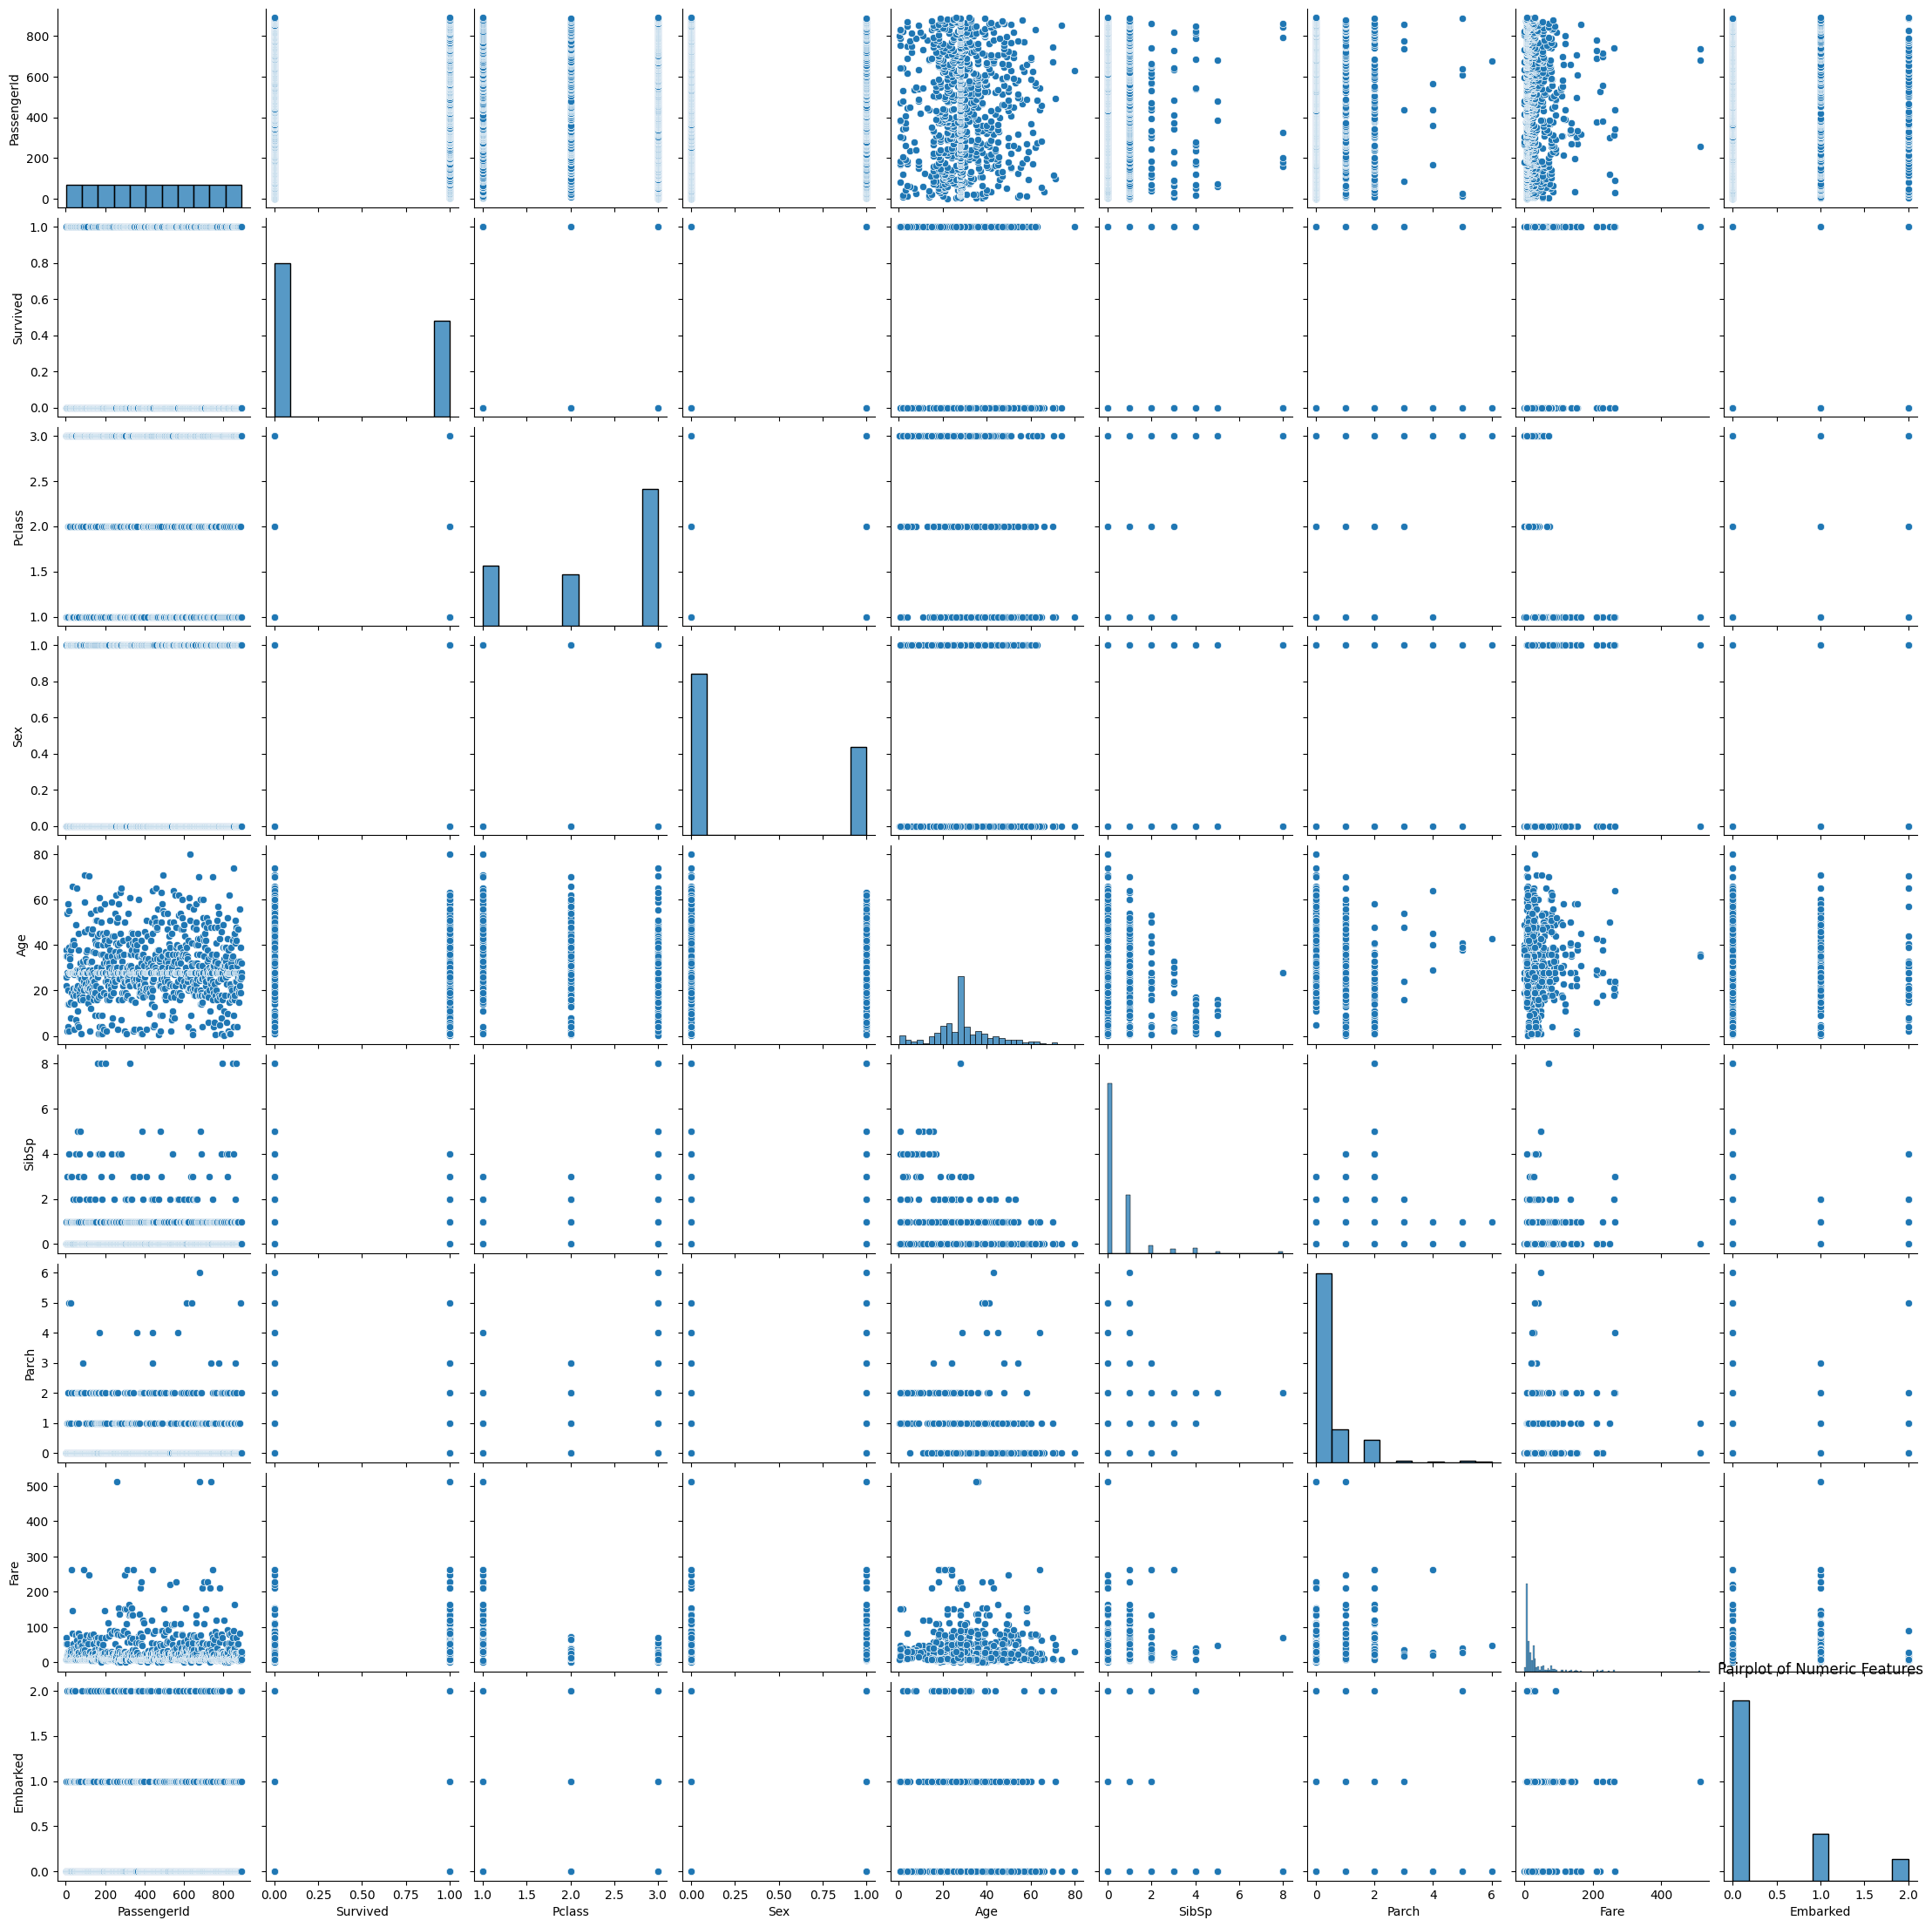

In [26]:
# Scatter plot for Age vs Fare colored by Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, alpha=0.7)
plt.title('Age vs Fare by Survival')
plt.show()

# Pairplot to see relationships between numeric features
sns.pairplot(numeric_df)
plt.title('Pairplot of Numeric Features')
plt.show()


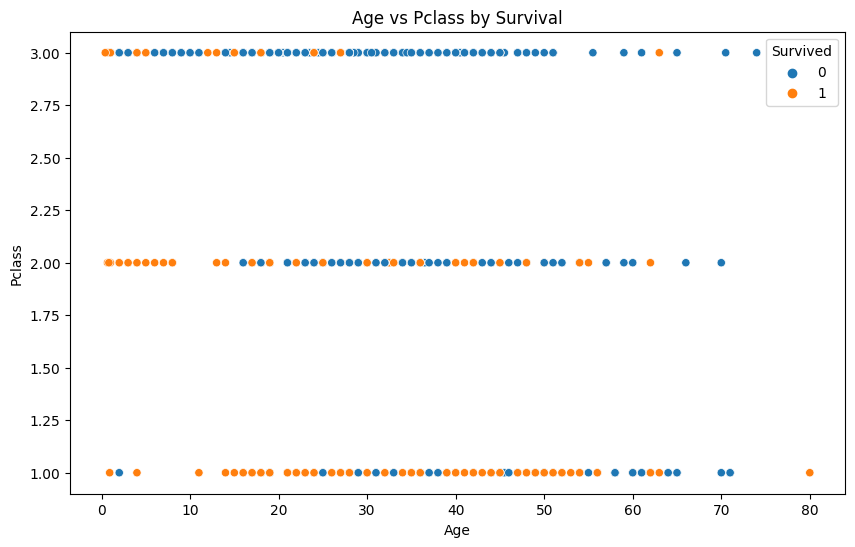

In [27]:
# Scatter plot for Age vs Pclass
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pclass', hue='Survived', data=data)
plt.title('Age vs Pclass by Survival')
plt.show()
